# A Simple Example of Analyzing COVID-19 Data in Python

## Data Source

The data is downloaded from  [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).
Upload the data to an S3 bucket, and import the necessary python libraries.

In [5]:
%matplotlib inline
import pandas as pd 

## Import Data from S3 Bucket

In [7]:
df = pd.read_excel('') # provide the data location
df.head() #show the top 5 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


## The Sum of Case Numbers per Day

<AxesSubplot: xlabel='dateRep'>

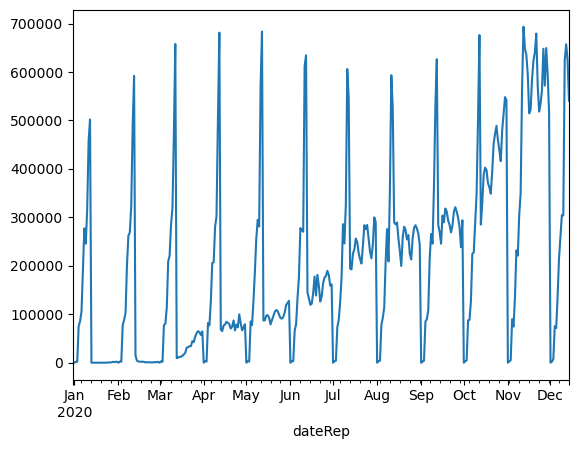

In [63]:
df['dateRep'] = pd.to_datetime(df['dateRep']) #convert to date format

sum_death_by_date = df.groupby('dateRep')['cases'].sum()
sum_death_by_date.plot()

## The Top 10 Countries with the Highest Deaths

<AxesSubplot: xlabel='countriesAndTerritories'>

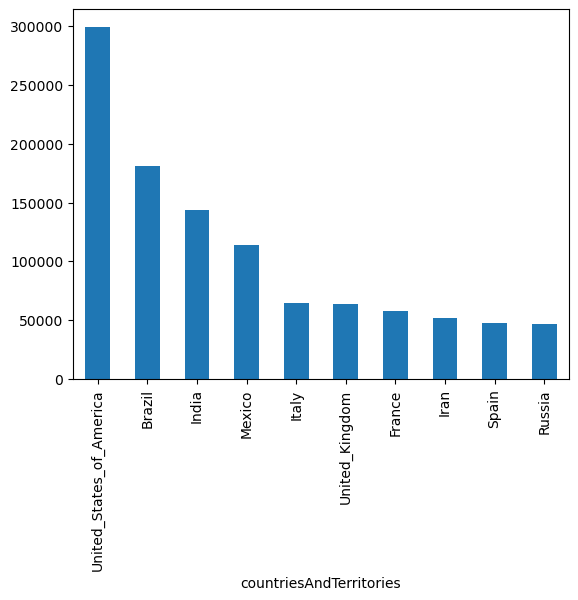

In [14]:
sum_death_by_country = df.groupby('countriesAndTerritories')['deaths'].sum()
sum_death_by_country.nlargest(10).plot.bar()

## The List of the Unique Countries and Territories

In [15]:
pandas.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## Select the USA Data

In [16]:
usa_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']
usa_data.head() #the top 5 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
59001,2020-12-14,14,12,2020,189723,1340,United_States_of_America,US,USA,329064917.0,America,873.211592
59002,2020-12-13,13,12,2020,216017,2315,United_States_of_America,US,USA,329064917.0,America,857.089241
59003,2020-12-12,12,12,2020,234633,3343,United_States_of_America,US,USA,329064917.0,America,838.514183
59004,2020-11-12,11,12,2020,224680,2748,United_States_of_America,US,USA,329064917.0,America,830.394205
59005,2020-10-12,10,12,2020,220025,3124,United_States_of_America,US,USA,329064917.0,America,794.356027


## How the Number of Cases is Related to the Number of Deaths

<AxesSubplot: xlabel='cases', ylabel='deaths'>

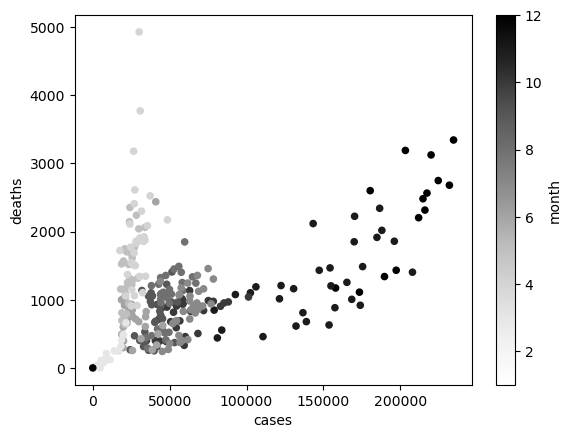

In [61]:
usa_data.plot.scatter(x='cases',y='deaths',c= 'month')
